What is Machine Learning?

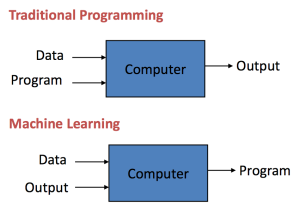

In [24]:
#Traditional Programming
#We have data and hypothesis function and We pass the data to function to generate output
import numpy as np
import math
data = np.arange(1,101)

def program(input):
  return 2*math.pow(input,3)-5*math.pow(input,2)+6*input+10 #2x^3-5x^2+6x+10

output = [program(x) for x in data]
print(f"First 5 elements of data {list(data[:5])}")
print(f"First 5 elements of output {list(output[:5])}")

First 5 elements of data [1, 2, 3, 4, 5]
First 5 elements of output [13.0, 18.0, 37.0, 82.0, 165.0]


In [25]:
df = pd.DataFrame({'data':data,'output':output})

In [31]:
df

,data,output
0,1,13.0
1,2,18.0
2,3,37.0
3,4,82.0
4,5,165.0
...,...,...
95,96,1723978.0
96,97,1778893.0
97,98,1834962.0
98,99,1892197.0


In [26]:
#Machine Learning is Reverse Engineering the hypothesis function
X = df['data']
y = df['output']

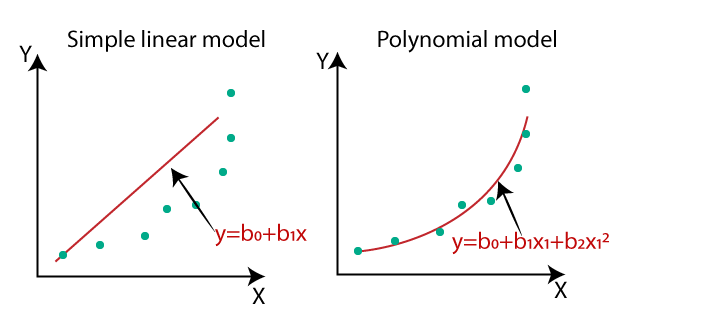

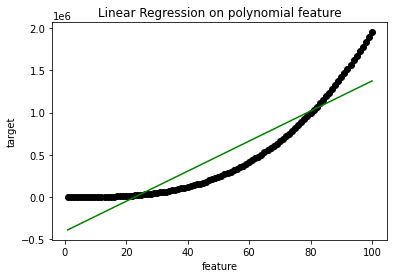

In [33]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X.values.reshape(-1,1),y)
preds = lr.predict(X.values.reshape(-1,1))
plt.scatter(X, y,  color='black')
plt.plot(X, preds, color = "green")
plt.title("Linear Regression on polynomial feature")
plt.xlabel("feature")
plt.ylabel("target")
plt.show()


In [35]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree=3
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X.values.reshape(-1,1),y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [36]:
polyreg[1].coef_

array([ 0.,  6., -5.,  2.])

In [37]:
polyreg[1].intercept_

10.00000000023283

In [38]:
polyreg.predict([[200]])

array([15801210.00000001])

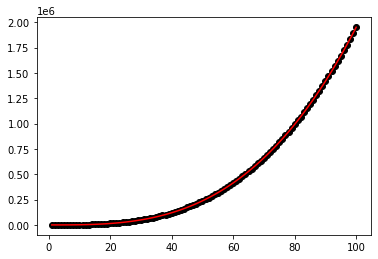

In [40]:
mymodel = np.poly1d(np.polyfit(X, y, 3))
myline = np.linspace(1, 100, 100)
plt.scatter(X, y,color='black')
plt.plot(myline, mymodel(myline),color='red')
plt.show()

#Regression Example

In [70]:
import pandas as pd
data = pd.read_csv('https://online.stat.psu.edu/onlinecourses/sites/stat501/files/data/bluegills.txt', sep="\t", header=0)

In [71]:
data

,age,length
0,1,67
1,1,62
2,2,109
3,2,83
4,2,91
...,...,...
73,6,170
74,4,160
75,5,180
76,4,160


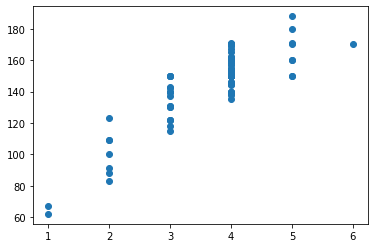

In [72]:
import matplotlib.pyplot as plt
plt.scatter(data['age'],data['length'])

In [73]:
data.count()

age       78
length    78
dtype: int64

In [74]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

X = data['age']
y = data['length']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [75]:
#Trying Linear Regression 
lr = LinearRegression()
lr.fit(X_train.values.reshape(-1,1),y_train)
preds = lr.predict(X_test.values.reshape(-1,1))

import numpy as np
from sklearn.metrics import r2_score,mean_squared_error

print(f"r2 score is {r2_score(y_test,preds)}") # Maximize this value (close to 0 is bad and close to 1 is the best case)
print(f"mean squared error  is {np.sqrt(mean_squared_error(y_test,preds))}") #minimize this value ( The closer it is to 0 the better it is)

r2 score is 0.72063628322022
mean squared error  is 14.446980717126275


In [76]:
#Trying Polynomial Regression
degree=3
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X_train.values.reshape(-1,1),y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [77]:
y_pred = polyreg.predict(X_test.values.reshape(-1,1))

In [78]:
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error

print(f"r2 score is {r2_score(y_test,y_pred)}")
print(f"mean squared error  is {np.sqrt(mean_squared_error(y_test,y_pred))}")

r2 score is 0.8044047707574331
mean squared error  is 12.08846679576843


In [79]:
pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

,Actual,Predicted
33,161,154.576194
0,67,60.916700
34,162,154.576194
12,131,133.922720
10,118,133.922720
77,170,154.576194
30,154,154.576194
4,91,103.336228
49,140,154.576194
66,160,167.196671
